# Using the Bloomberg Terminal to Explore Stock Market Trends: An Analysis of Historical EPS Forecast Accuracy for All Firms in the 2019 S&P 500 Index

### by Marc Angelo Acebedo



<img src = './visuals/cover.jpg'/>

## Investigation Overview

> Through using Bloomberg Excel functions, I gathered the following 4 stock price data for all firms in the 2019 S&P Index from 1999 - 2019:



- Actual EPS
- Forecasted EPS
- EOD Price
- Forecasted EPS (made 3 months prior)

For a broad picture, I wanted to examine the accuracy between **forecasted EPS** to their corresponding **actual EPS** values.

## Dataset Overview

The main dataset, **features.csv**, consists of 167,660 entries with 5 columns. 

The other dataset in question, **avgs.csv**, contains 52,015 with 5 columns.
>The quantitative values in this dataset consist of yearly, quarterly, and twenty-year *averages* extracted from the previous *features.csv* dataset.

Lastly, **firms.csv** assigns each firm abbreviation with firm ID as the primary key. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

#display png files
from IPython.display import Image

import warnings
warnings.simplefilter('ignore')

In [40]:
#define visualization paths
PATH_UNIVARIATE = './visuals/univariate/'
PATH_BIVARIATE = './visuals/bivariate/'
PATH_MULTIVARIATE = './visuals/multivariate/'
PATH_REGRESSION = './visuals/regression results/'

## Question 1
> Does average EPS prediction error depict any differences in trends among a yearly, quarterly, and full-term basis?

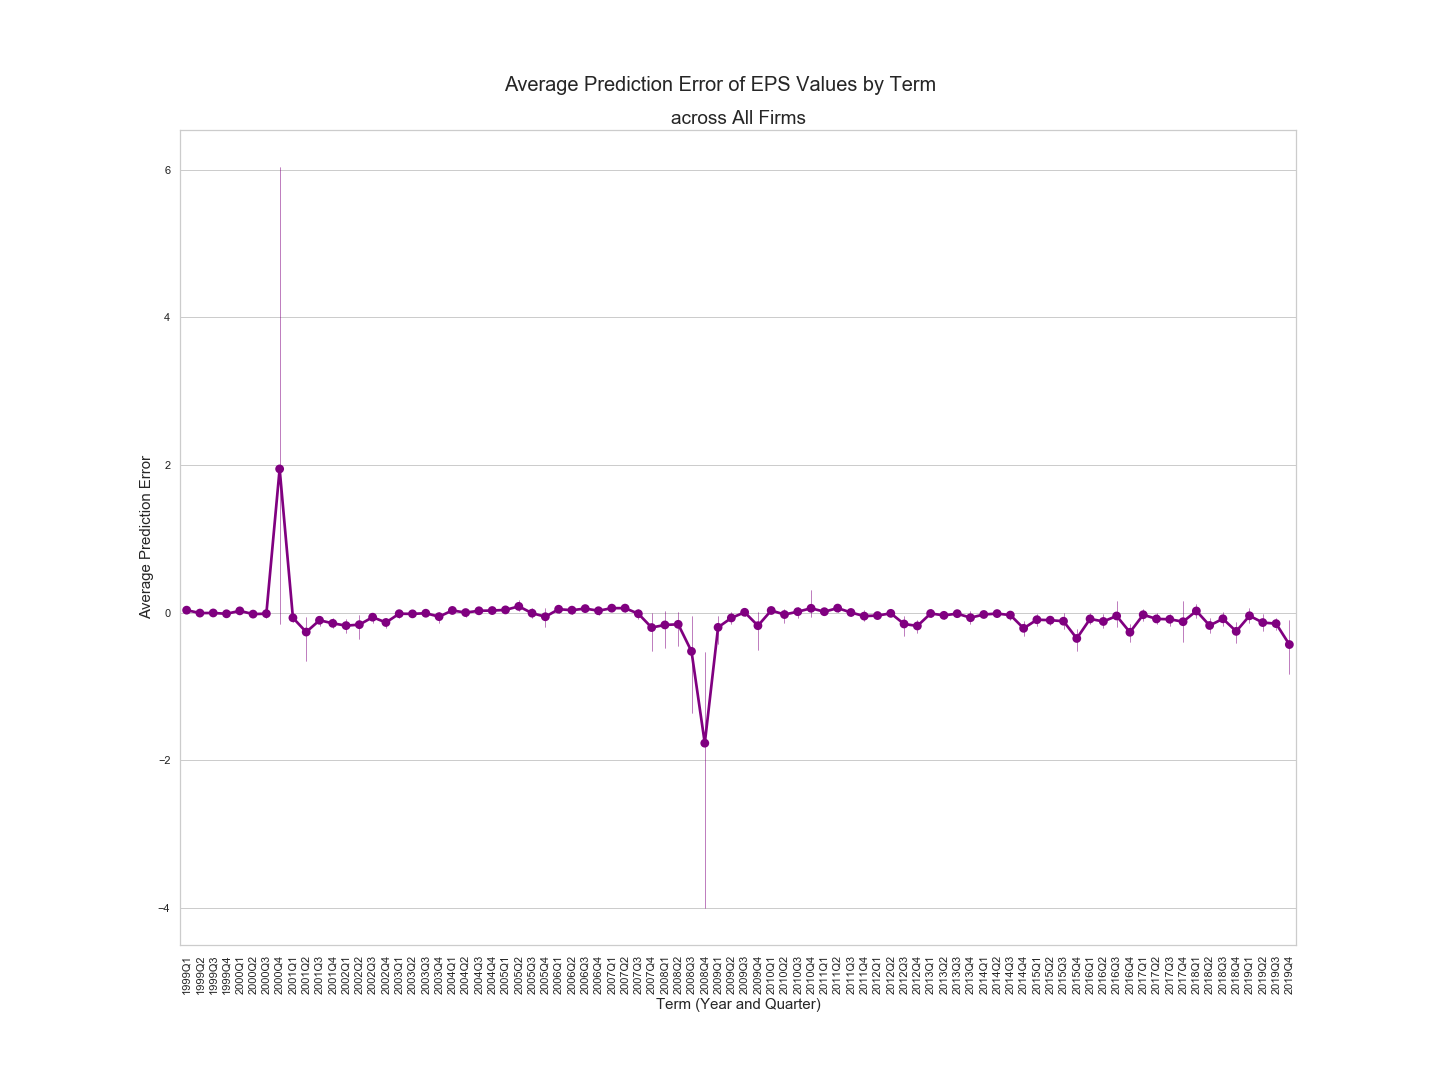

In [4]:
Image(filename = PATH_BIVARIATE + 'features-act-fc-diffs-term.png')

**Observation 1:** Bloomberg forecasters were most **optimistic** in 2008Q4, and most **pessimistic** in 2000Q4.

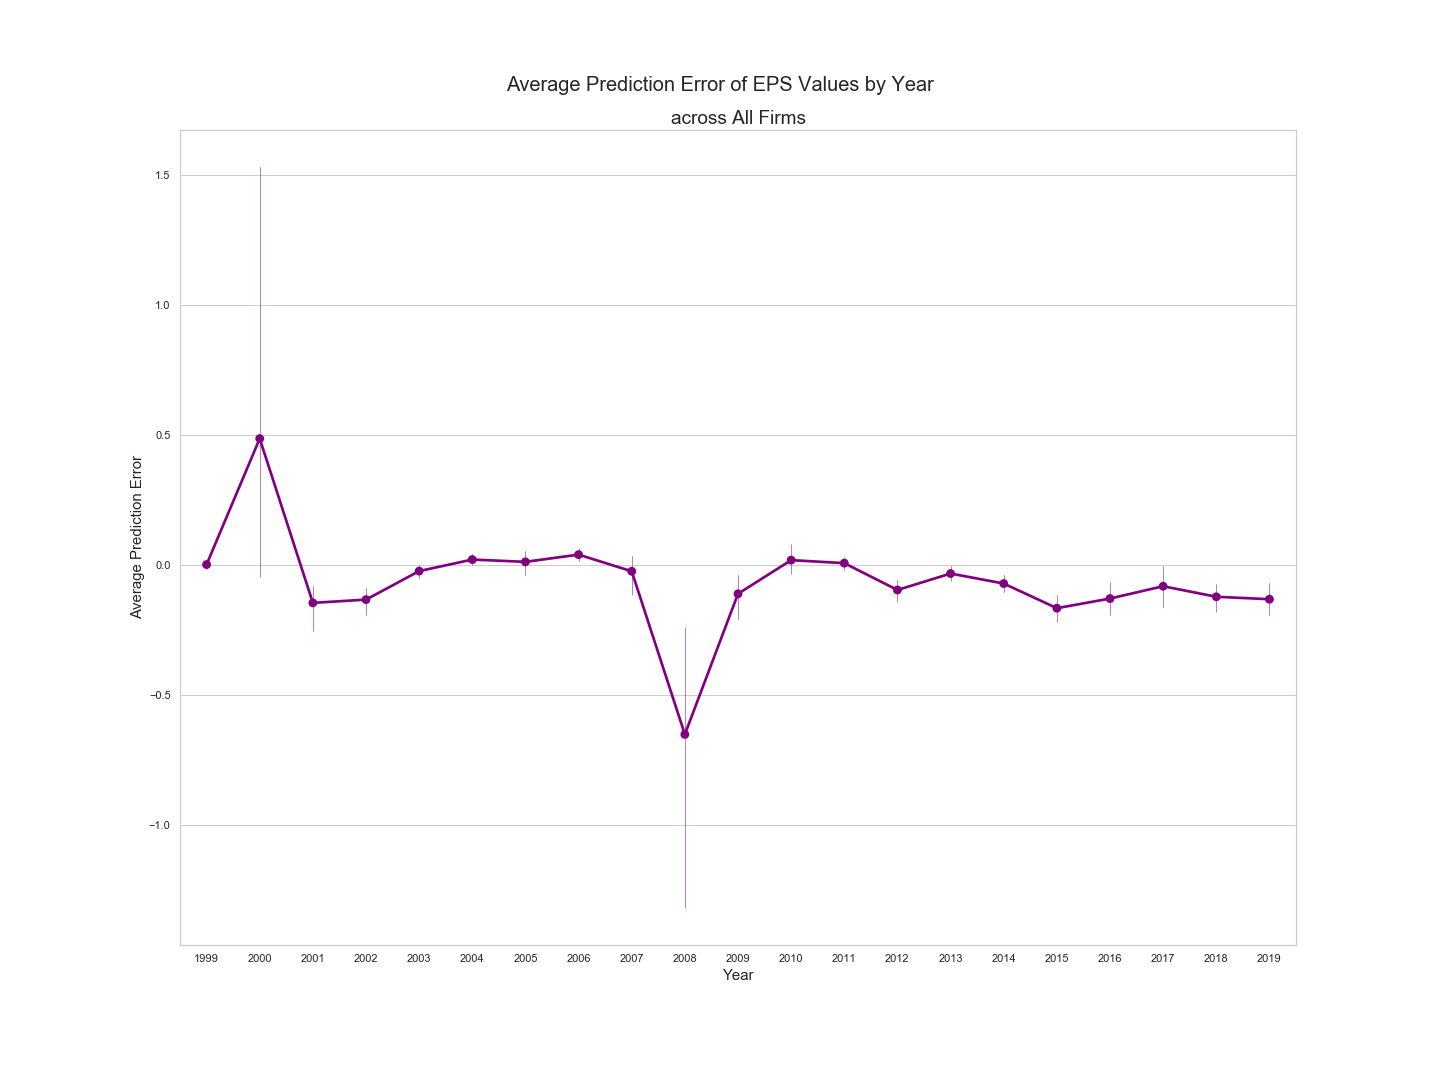

In [5]:
Image(filename = PATH_BIVARIATE + 'features-act-fc-diffs-year.png')

**Observation 2:** Forecasters were most **optimistic** in 2008, and most **pessimistic** in 2000.
> This is consistent with the previous observation depicting EPS prediction error by full term, not by year.

**Observation 3:** The year 2000 shows one of the widest variances in average prediction errors, ranging from 0 to 0.5.

- Stock Market Crash of 2008?

**Observation 4:** When ignoring the optimistic and pessimistic outliers, there is no slope.
> All average EPS prediction errors gather around 0.

**Observation 5:** The year 2000 shows one of the widest variances in average prediction errors, ranging from 0 to 0.5.

**Observation 6:** The year 2008 shows one of the widest variances in average prediction errors, ranging from -0.25 to -1.5.

> This means that **outlier** Bloomberg EPS forecasts, on average, contain variety of data points that are far away from the mean. This means that the most "pessimistic" and "optimistic" forecasts contain a wider spread of data, and thus, are associated with forecasters making higher risks.

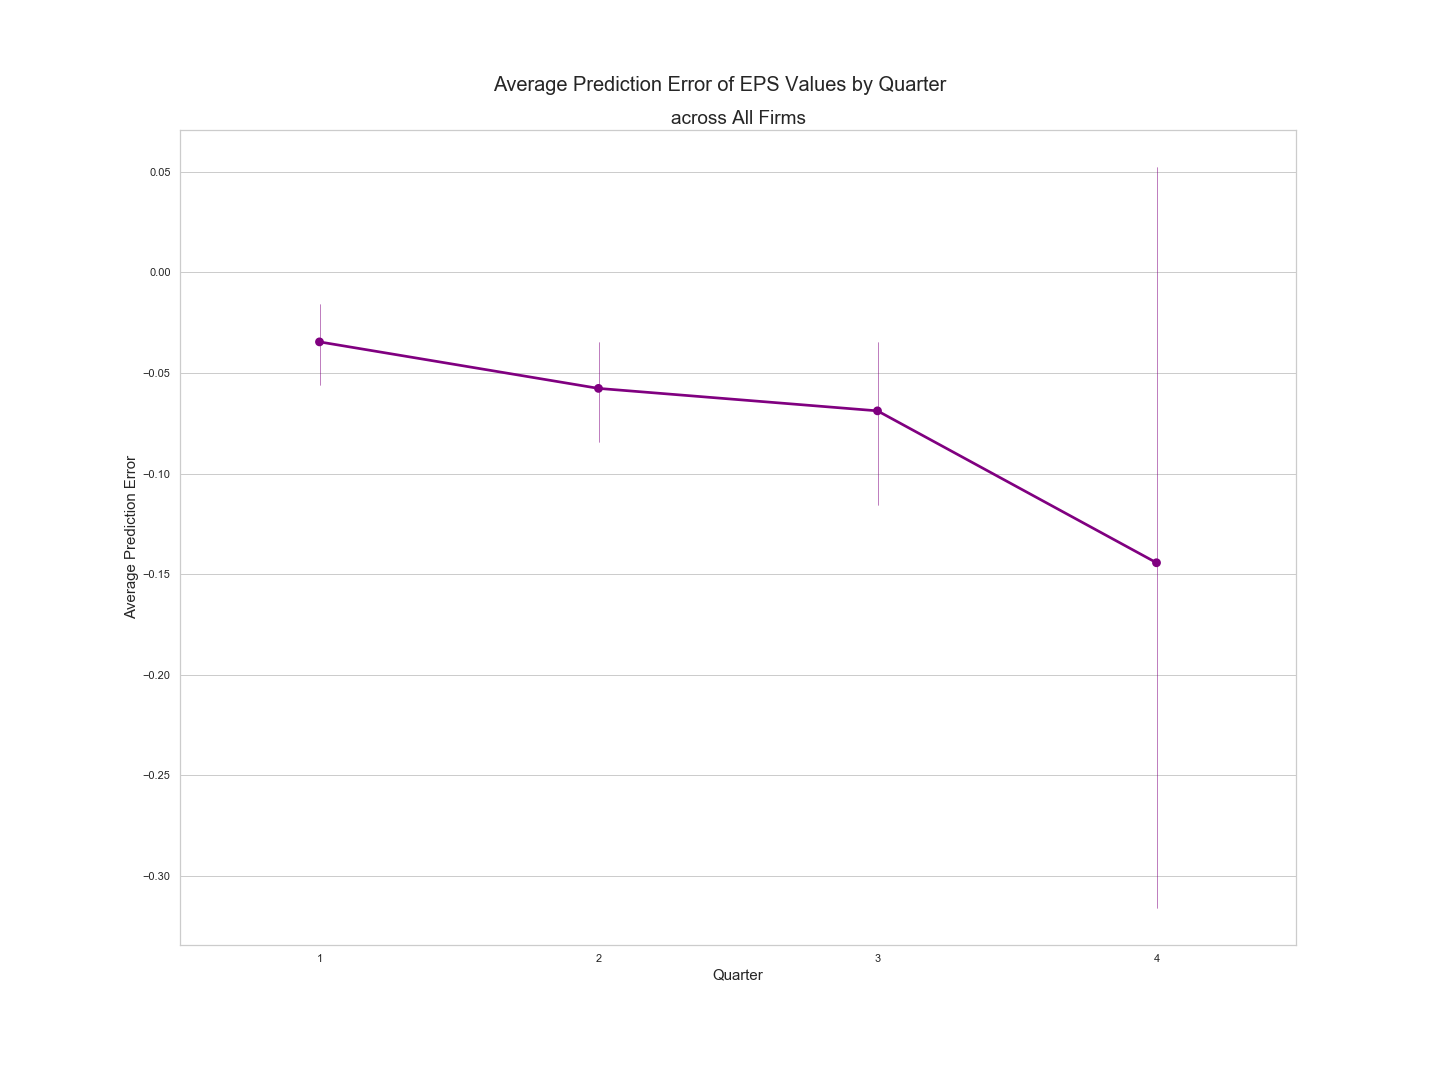

In [6]:
Image(filename = PATH_BIVARIATE + 'features-act-fc-diffs-quarter.png')

**Observation 5:** The later the quarter, the more optimistic forecasters become in their predictions. 

> Intuitively, this makes sense. As the familiarity of the year increases and stock market trends become more predictable, the more I conjecture that forecasters would become more confident in their EPS predictions.

**Observation 5a:** We only see a ***predictable pattern*** emerge when examining EPS prediction errors by a quarterly basis.
- pattern is *usually optimistic*
- outliers happen exclusively on Q4 of any given year.

## Question 2
> I generate "dumb EPS forecasts" by calculating the rolling mean of the 2 actual EPS values from the past 2 quarters. How do my EPS forecasts compare to Bloomberg's EPS forecasts?

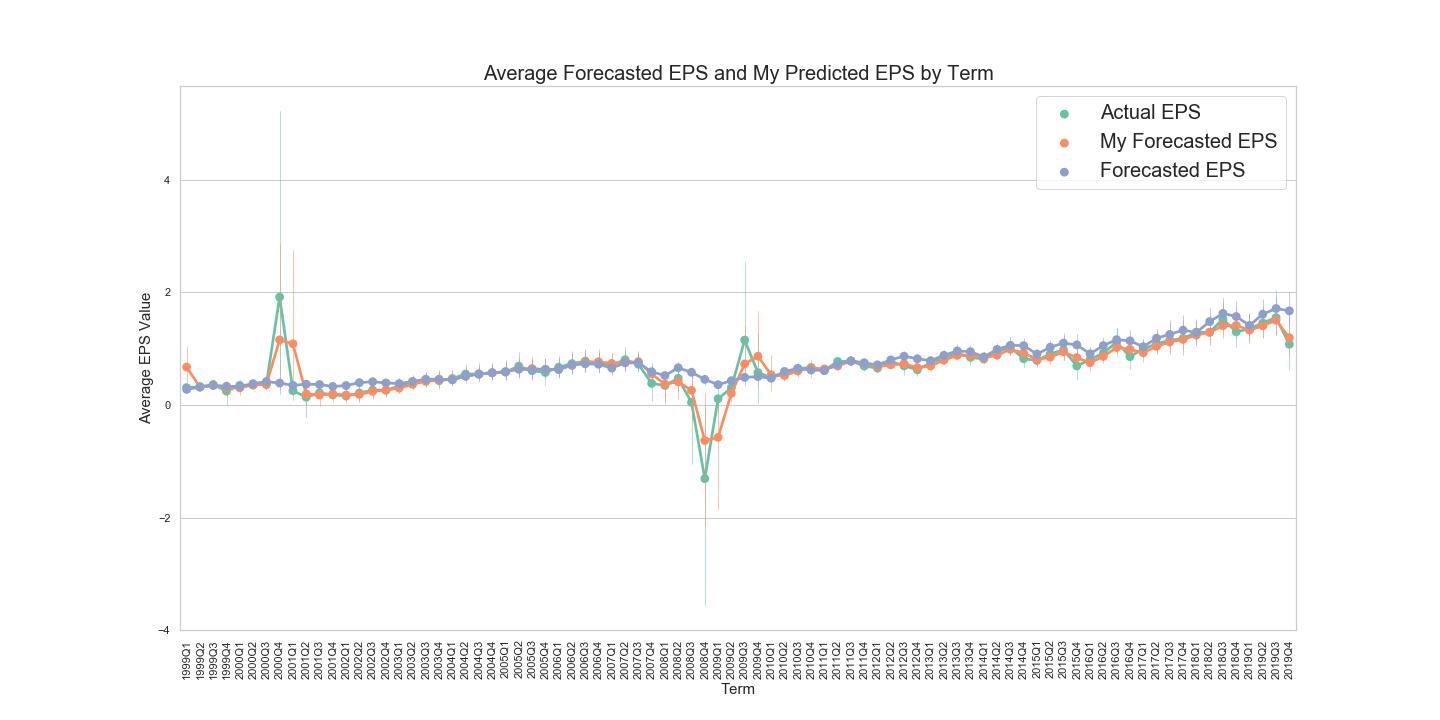

In [9]:
Image(filename = PATH_MULTIVARIATE + 'features-dumb-eps.png')

**Observation 1:** My average predicted EPS ***more closely follows the average actual EPS*** trend instead of the forecasters'.

> My method of using 2-quarter moving averages was much more effective in predicting average actual EPS than the method used by Bloomberg forecasters.

**Observation 2:** My predicted EPS is slightly less reliable; variance among my predictions is much higher, as shown through the above ***error bars*** by term.

- Though my prediction method more closely follows the actual EPS trend, my predicted values are much more "spread out" from the mean.

- All of my predictions contain higher variance than both the average of both actual EPS and Bloomberg EPS. This ***reduces  my prediction method's credibility*** when accounting for all individual data points.

**Observation 3:** My personal predictions "spiked" and "troughed" in 2000Q4 and 2008Q4--the exact same pattern depicted through the trends under Question 1.

**Observation 4:** Bloomberg' forecasted EPS displays *less* variance, and is only slightly more reliable than my method of using 2-quarter, or half-year, averages.

# Examine Regression Results

## One-Tailed Hypothesis Test:

$$ H_0: Actual EPS - My Forecasted EPS \leq 0 $$
$$ H_1: Actual EPS - My Forecasted EPS \> 0 $$

## statsmodels regression results (OLS)

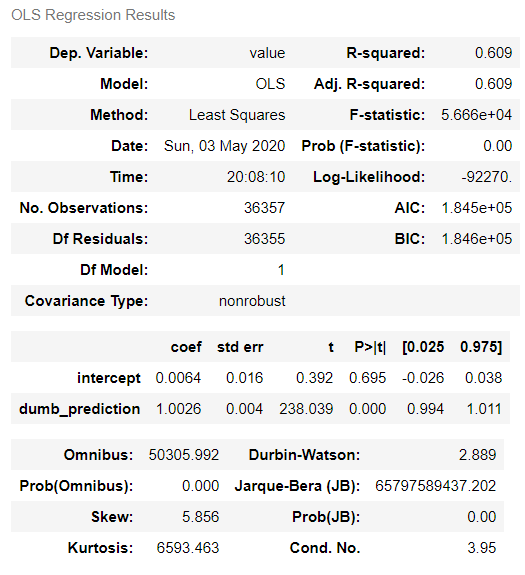

In [41]:
Image(PATH_REGRESSION + 'my-eps-ols.png')

**Observation 5:** The p-value for the relationship between actual EPS and ***my forecasted EPS*** is 0.00. Similarly, the p-value for the relationship between actual EPS and ***Bloomberg forecasted EPS*** is 0.00.

- Both relationships are statistically significant.

> These p-values lead me to ***reject the null hypothesis*** in favor of the alternative that there is no difference between the means of actual EPS and both EPS forecast types.

**Observation 6:** Regardless of my forecast method containing high variance, the two p-values prove that the 2 relationships are not provable by chance alone.

## Question 3:

> What differences/similarities emerge when analyzing the prediction error and percentage error of EPS forecasts?

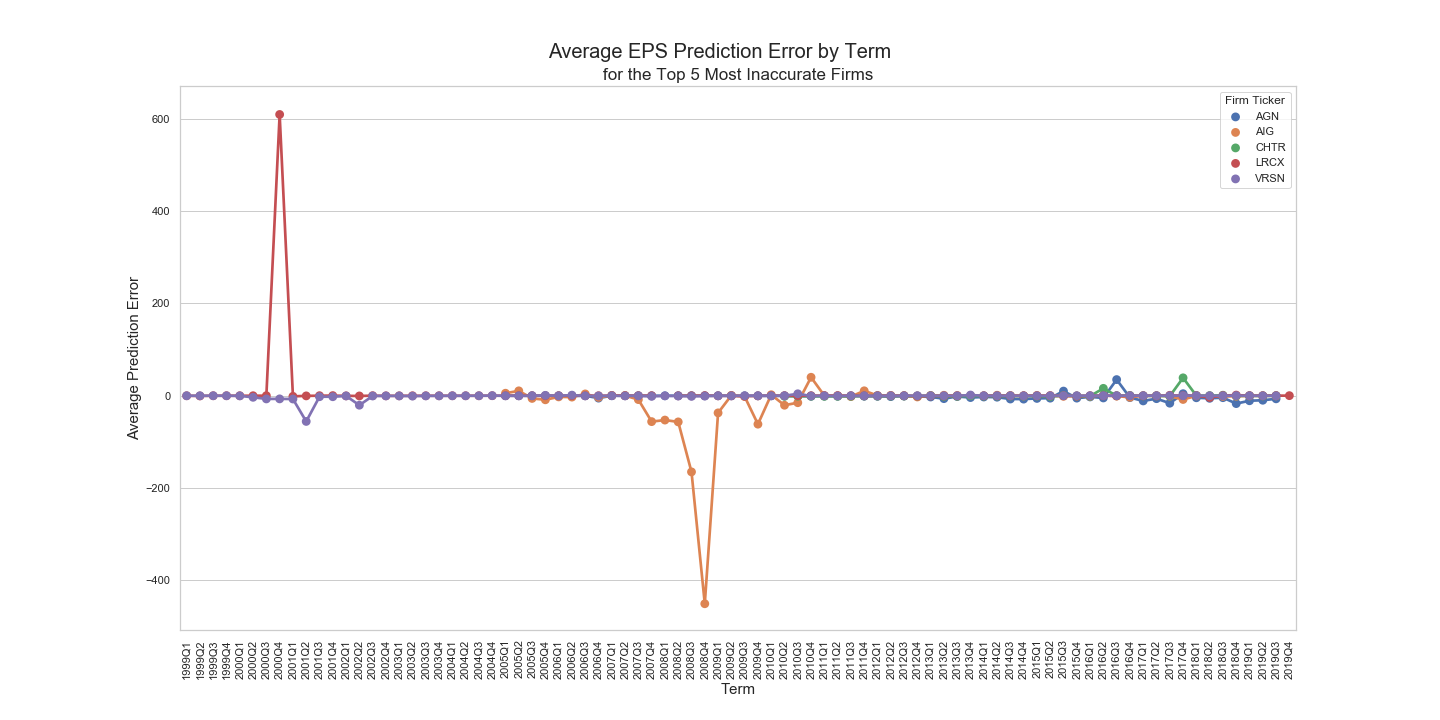

In [12]:
Image(PATH_MULTIVARIATE + 'features-perror-term-firm.png')

**Observation 1:** The top 5 most inaccurate firm tickers in terms of absolute ***prediction error*** are AGN, AIG, CHTR, LRCX, and VRSN.

> These stand for Allergan plc, American International Group Inc, Charter Communications Inc, Lam Research Corporation, and Verisign.

**Observation 1a:** The most notable outlier is **AIG.**
> This firm is, on average, the *only outlier* in Q4 of any given year.

- AIG sees a spike in optimistic forecasts in 2008Q4, while LCRX sees a spike in pessimistic forecasts in 2000Q4.

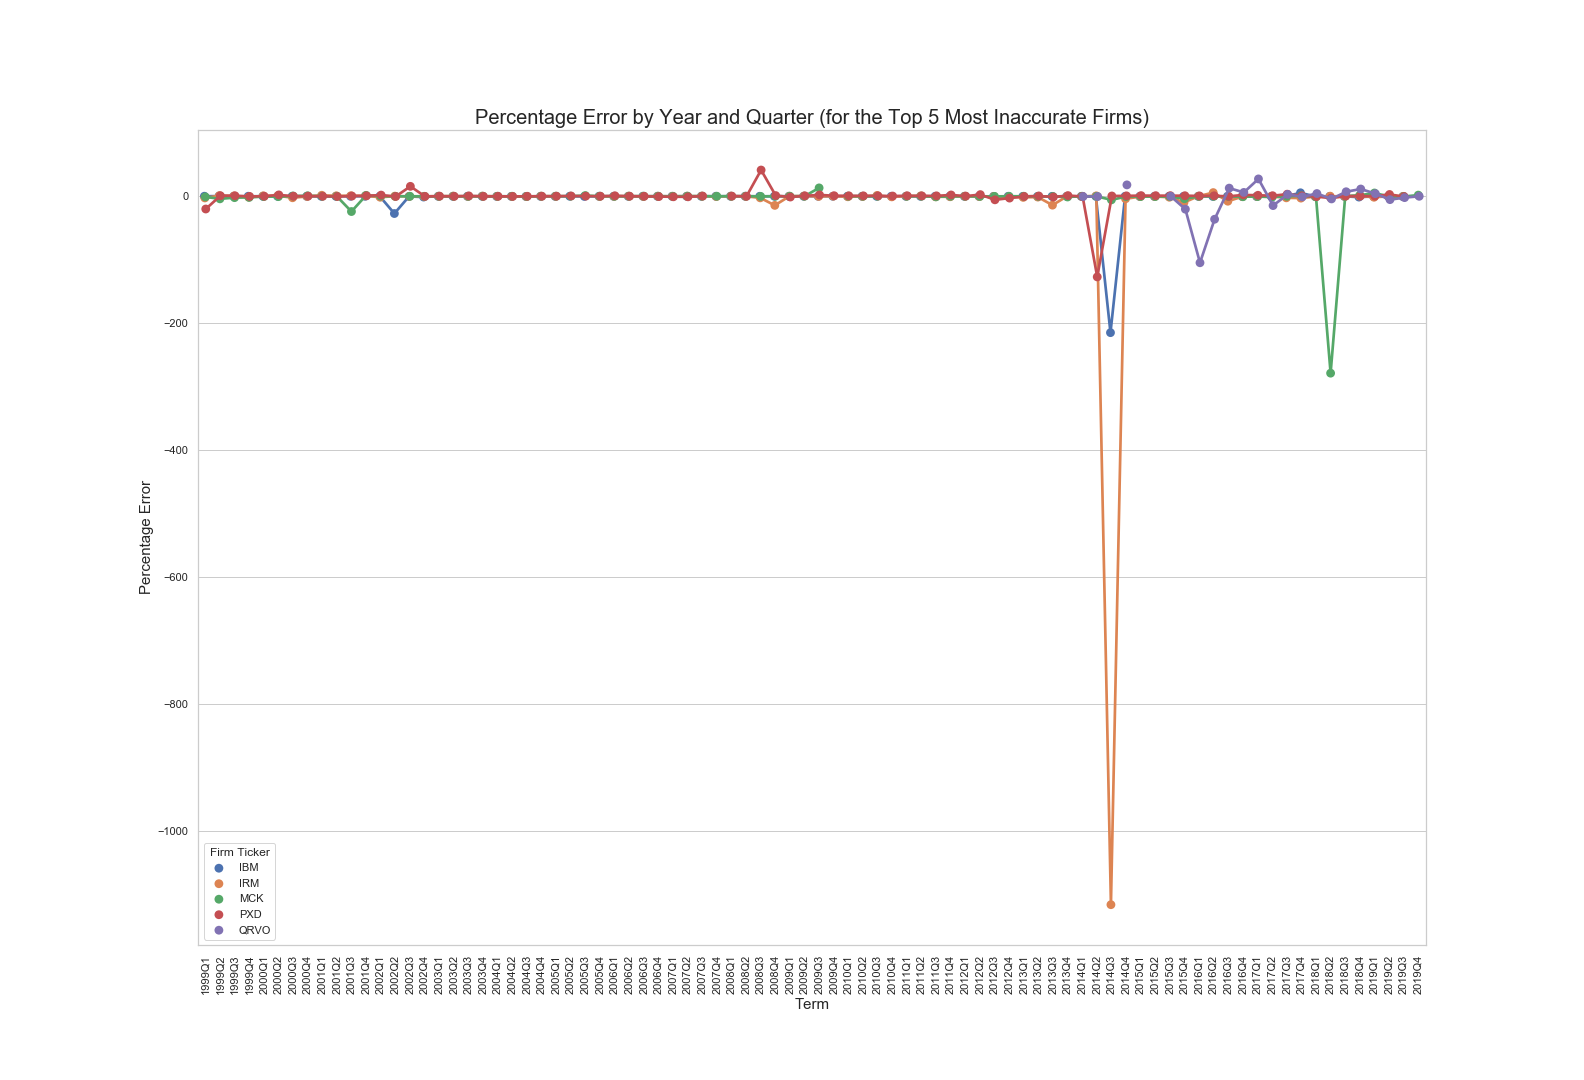

In [38]:
Image(PATH_MULTIVARIATE + 'pct-firm-term.png')

**Observation 2:** The top 5 most inaccurate firm tickers in terms of absolute ***percentage error*** are IBM, IRM, MCK, PXD, and QRVO.

> These stand for IBM Common Stock, Iron Mountain Inc., McKesson Corporation, Pioneer Natural Resources, and Qorvo Inc.

**Observation 2a:** The most notable outlier is **IRM.**

- Percentage error of over -1000 for EPS in the term 2014Q3.

- Outliers only start appearing in the year 2014 onward.

**Observation 3:** For *prediction errors*, Bloomberg forecasters, on average, are likely to be more inaccurate in Q4 of any given year.

> The top 5 most inaccurate firms by prediction error display relatively low average prediction errors until Q4, when both LRCX and AIG "branch off" into opposite directions.

**Observation 4:** For *percentage errors*, EPS forecasts have ***become more inaccurate in the more recent terms***, starting from 2014Q3.

> This observation is consistent with the observations made in the quarterly and yearly stripplots below.

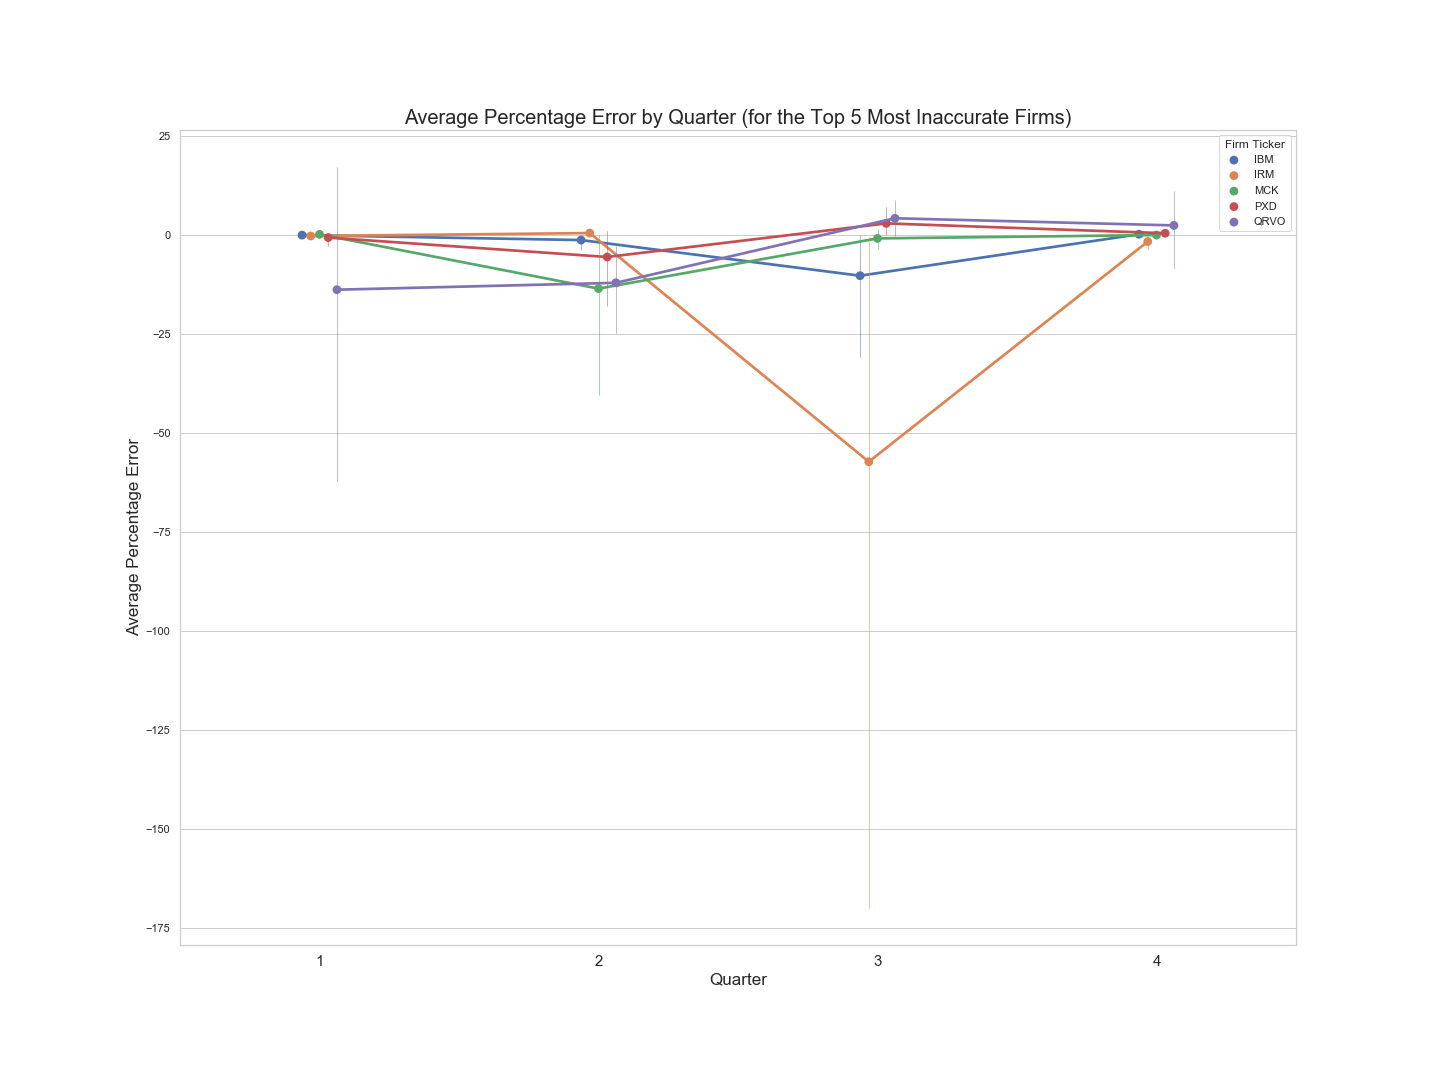

In [15]:
Image(PATH_MULTIVARIATE + 'pct-firm-quarter.png')

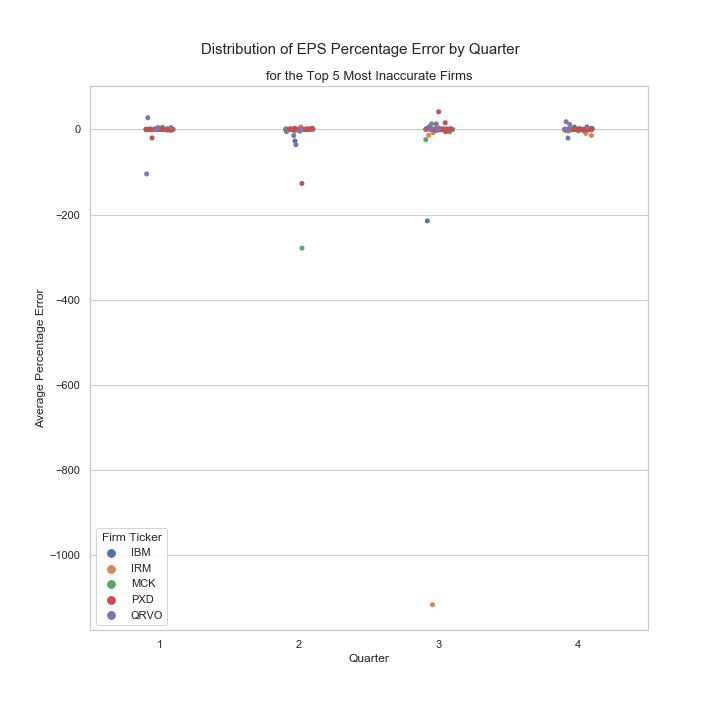

In [16]:
Image(PATH_MULTIVARIATE + 'pct-firm-quarter-top-strip.png')

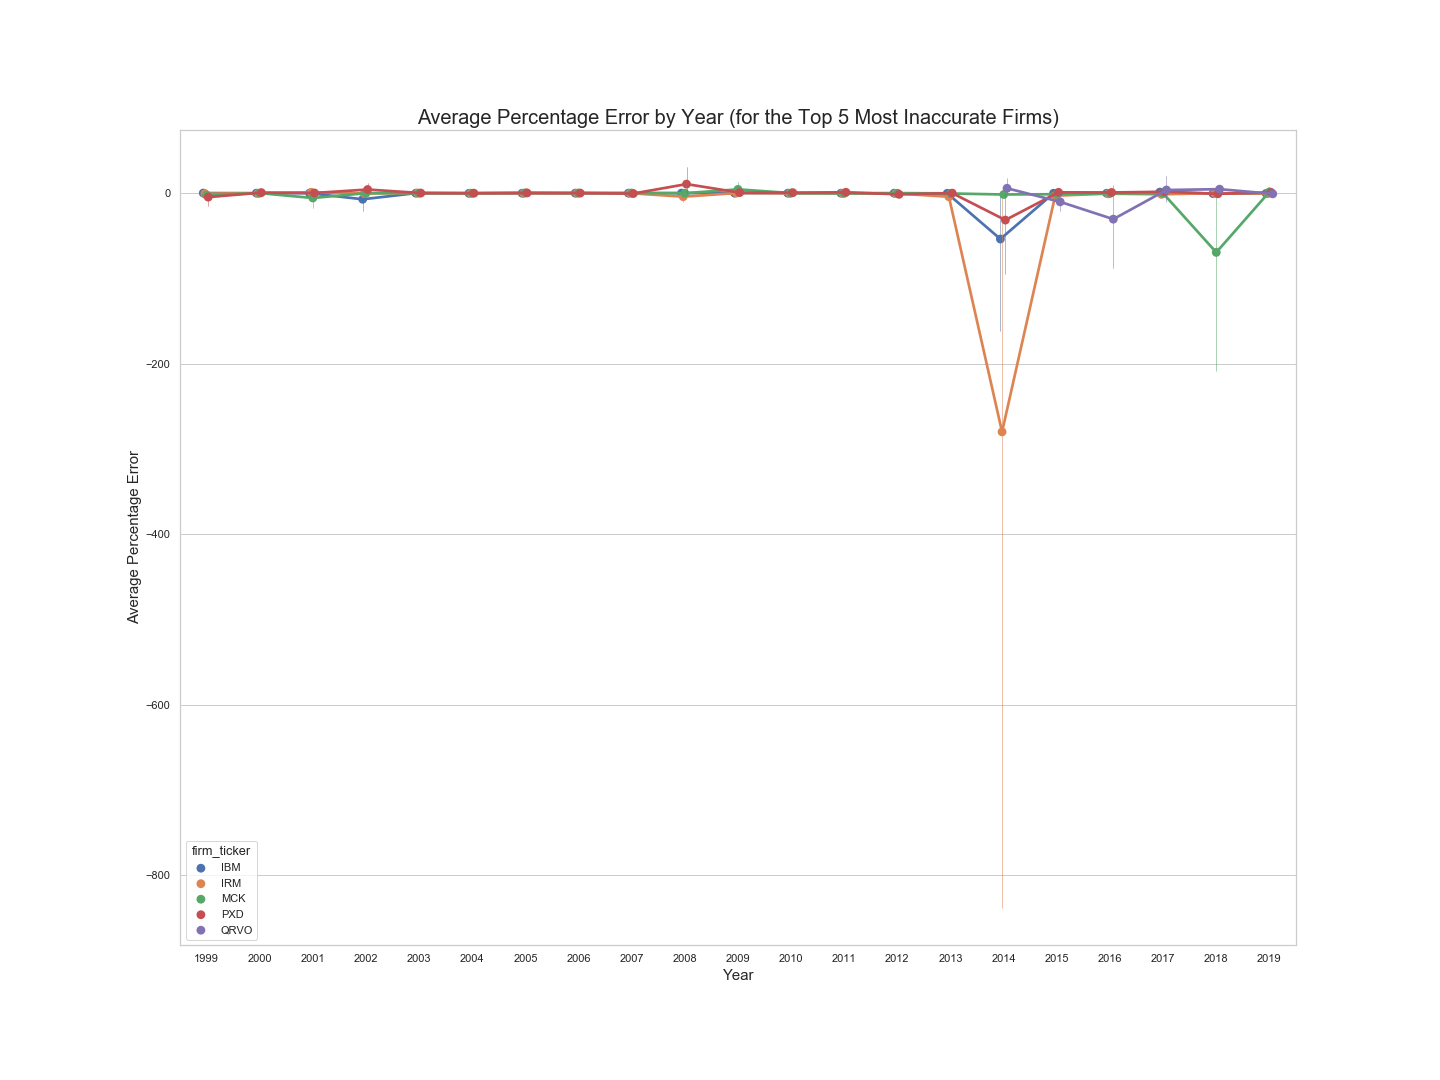

In [24]:
Image(PATH_MULTIVARIATE + 'pct-firm-year-top.png')

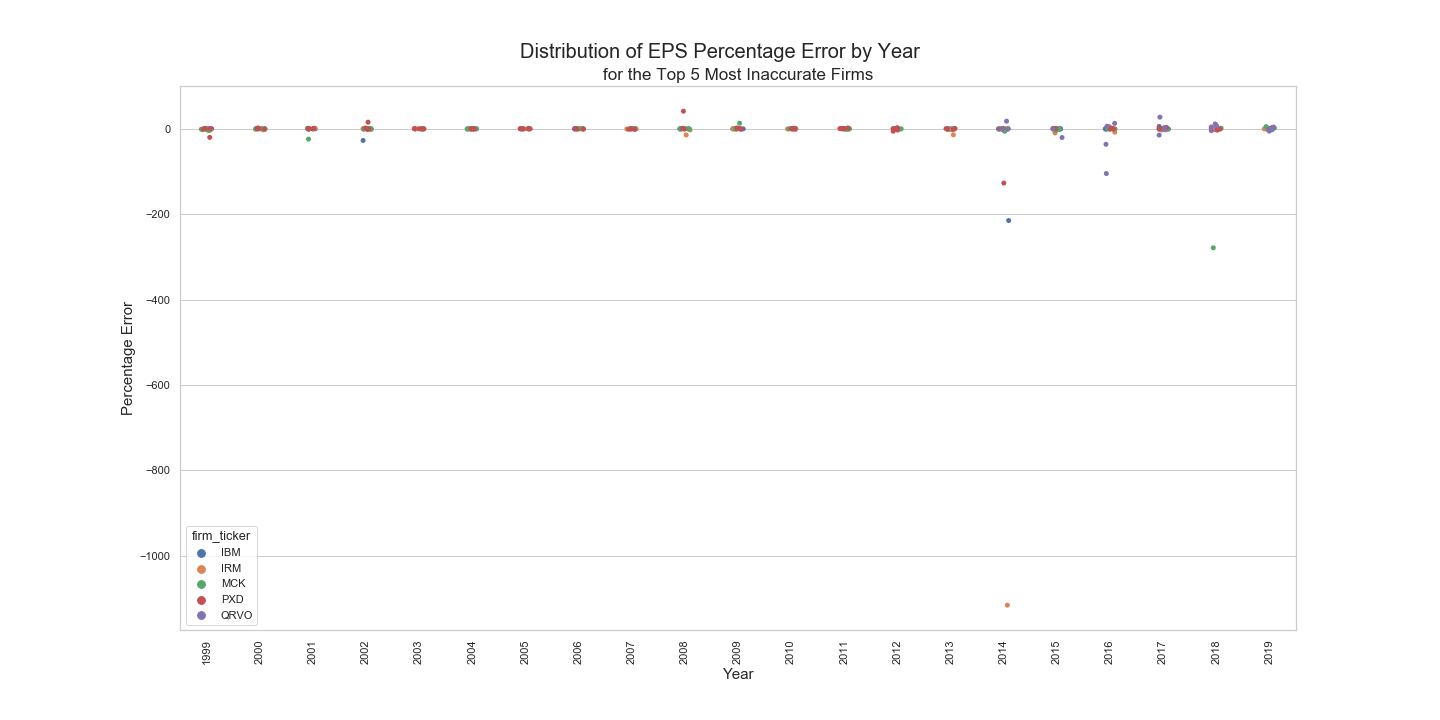

In [25]:
Image(PATH_MULTIVARIATE + 'pct-firm-year-top-strip.png')

**Note**: prediction error charts are *not* consistent with the average percentage error charts.

- Percentage error tells you how "big" your errors are

- Prediction error simply tells you how "close" your prediction error was to the accepted value.

## Question 4:

> Does statistical significance stay true in the relationship between actual and forecasted EPS, regardless of forecasted EPS type (yearly, quarterly, twenty-year, and raw data)?

### Short answer: Yes.

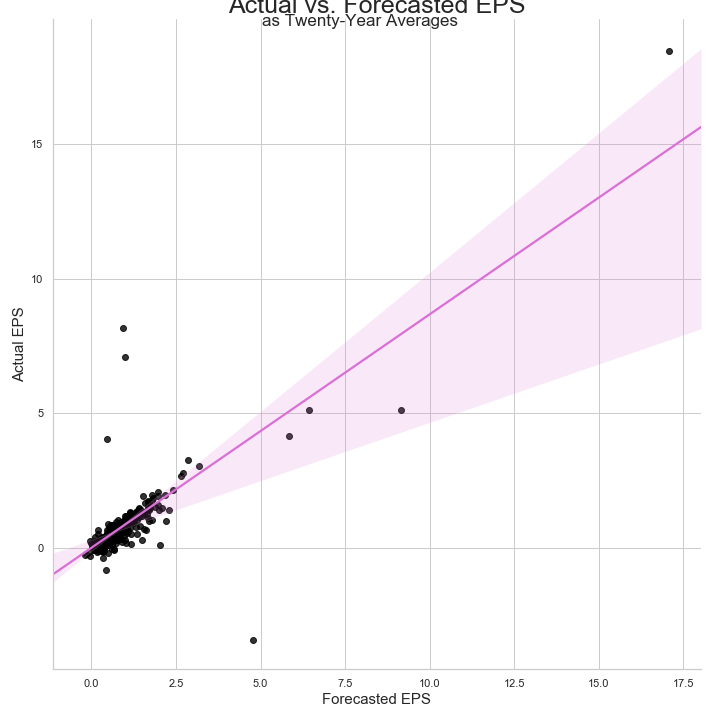

In [28]:
Image(PATH_BIVARIATE + 'avgs-act-fc-twenty.png')

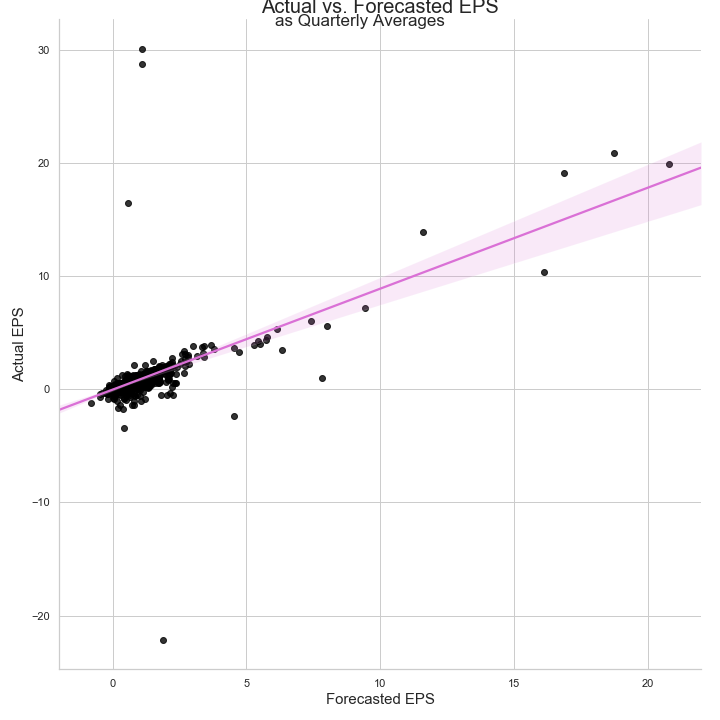

In [29]:
Image(PATH_BIVARIATE + 'avgs-act-fc-quarter.png')

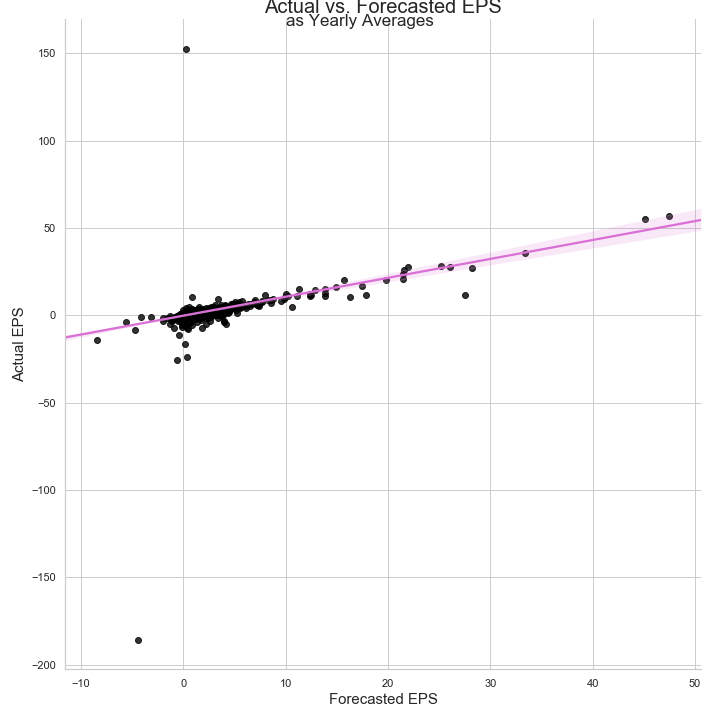

In [30]:
Image(PATH_BIVARIATE + 'avgs-act-fc-year.png')

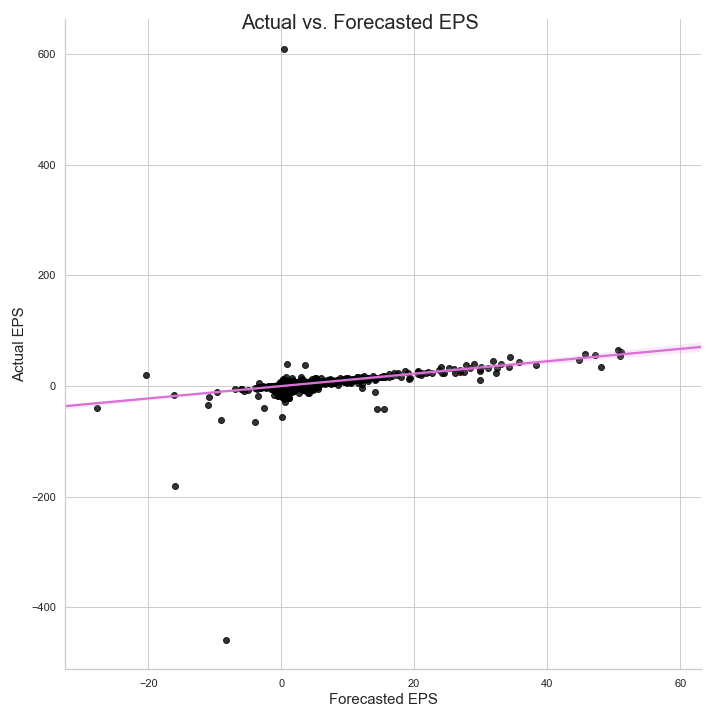

In [31]:
Image(PATH_BIVARIATE + 'features-act-fc-all.png')

**Observation 1:** All figures depict a moderately positively correlated relationship between actual EPS and both forecasted EPS types (Bloomberg's and my own).

**Observation 2:** When using the raw forecasted EPS instead of EPS averages, a ***weak positive relationship emerges.***

> This intuitively makes sense; trends tend to become more unpredictable over longer spans of time, especially given the stock market's dynamic nature. This would give rise to outliers that weaken the overall direction of the distribution.

**Observation 3:** From x = 0 onward, the initial cluster of points for each figure gradually "declusters" while maintaining minimal distance from the regression line.


**Observation 4:** Out of all the regression plots, the ***raw data displays the least amount of variance.***

> This could also mean the raw data has the lowest amount of bias.

### And here are the regression results for the above visuals:

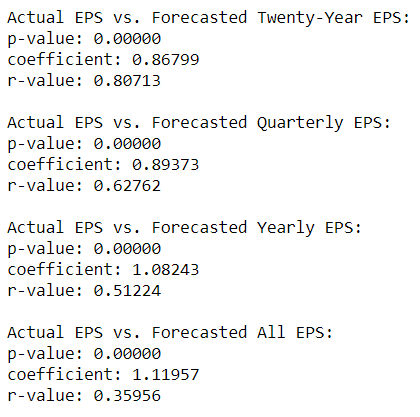

In [44]:
Image(PATH_REGRESSION + 'eps-ols.png')

**Observation 5:** All p-values are recorded at 0.00, which is less than the established Type I error threshold of 0.05.

**Observation 6:** Among the OLS models, all r-values are ***positive***, with values varying between 0.3 and 0.8.


## Question 5

> How do EOD prices trend across all firms from 1999 - 2019?

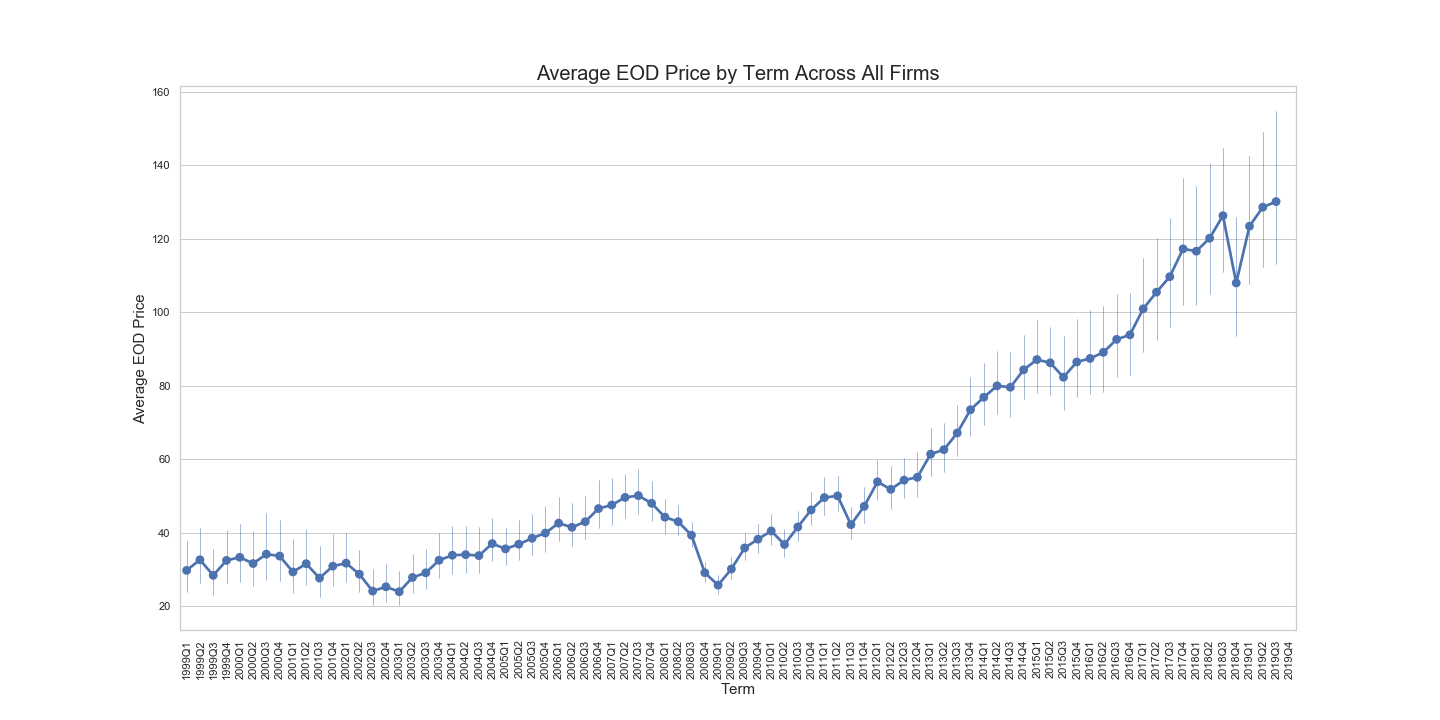

In [33]:
Image(PATH_BIVARIATE + 'features-eod-term.png')

**Observation 1:** EOD prices "trough" from 2007 - 2009: the exact years of the Great Recession.


- A catastrophic bear market took hold in the USA between 2007 and 2009.

- In 2008, the S&P was down around -38%.

- In 2009, the S&P 500 Index made a speedy recovery, finishing at around 23%.

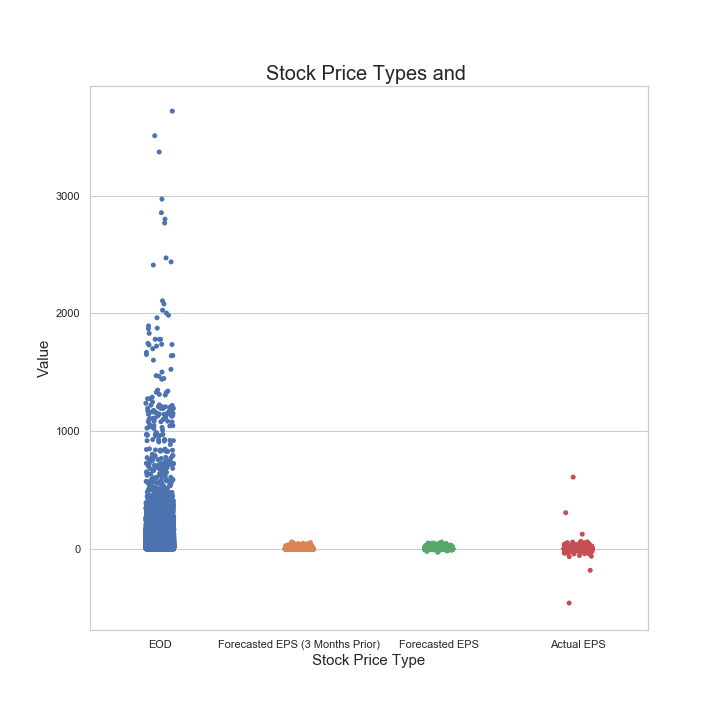

In [37]:
Image(PATH_BIVARIATE + 'features-feature-value.png')

**Observation 2:** All patterns shown in the Actual vs. Forecasted pointplots are consistent with the EOD distribution shown in the above visual.

- In the above stripplot, actual EPS has the most outliers. 

- There are a few "spikes" in the pointplots where actual EPS significantly veers away from the forecasted EPS trend line.